# Kompresija podataka

QR rastav s pivotiranjem stupaca možemo koristiti za _kompresiju (sažimanje) podataka_.

Dijagonalni elementi matrice $R$ padaju po apsolutnoj vrijednosti pa možemo odrezati djelove matrica $Q$ i $R$ za koje smatramo da nisu značajni.

Dat ćemo primjer kompresije slike.

In [1]:
# import Pkg; Pkg.add("Images")

In [2]:
using Images

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1192


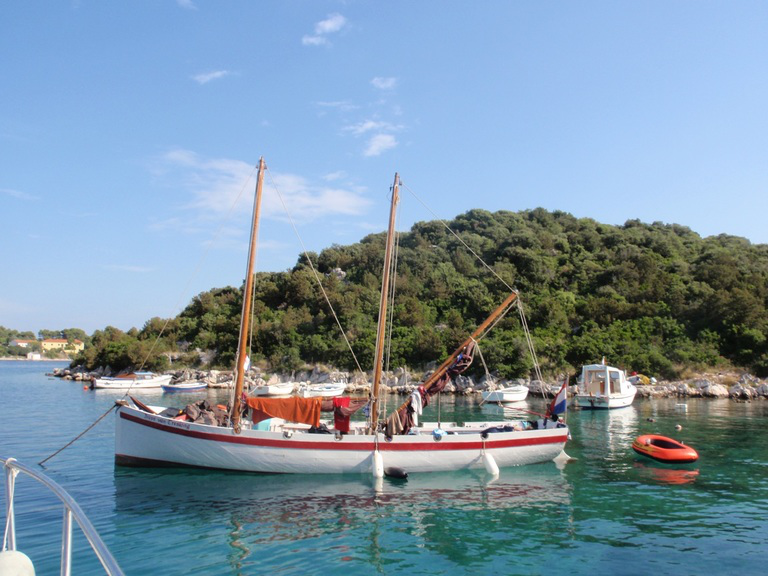

In [4]:
img=load("P8040001a.jpg")

In [3]:
# Opis podataka
typeof(img)

Array{RGB{Normed{UInt8,8}},2}

In [4]:
img[1,1]

In [5]:
show(img[1,1])

RGB{N0f8}(0.439,0.624,0.843)

In [6]:
# Razdvojimo sliku na R, G i B komponente
channels=channelview(img)

3×576×768 reinterpret(N0f8, ::Array{RGB{N0f8},3}):
[:, :, 1] =
 0.439  0.447  0.439  0.435  0.447  …  0.886  0.886  0.89   0.894  0.894
 0.624  0.631  0.624  0.62   0.631     0.886  0.886  0.89   0.894  0.894
 0.843  0.851  0.843  0.839  0.851     0.847  0.847  0.851  0.855  0.855

[:, :, 2] =
 0.439  0.443  0.443  0.439  0.443  …  0.89   0.89   0.89   0.894  0.894
 0.624  0.627  0.627  0.624  0.627     0.89   0.89   0.89   0.894  0.894
 0.843  0.847  0.847  0.843  0.847     0.851  0.851  0.851  0.855  0.855

[:, :, 3] =
 0.443  0.439  0.447  0.447  0.439  …  0.898  0.898  0.898  0.902  0.902
 0.627  0.624  0.631  0.631  0.624     0.898  0.898  0.898  0.902  0.902
 0.847  0.843  0.851  0.851  0.843     0.859  0.859  0.859  0.863  0.863

...

[:, :, 766] =
 0.62   0.624  0.624  0.624  0.627  …  0.263  0.267  0.302  0.302  0.286
 0.769  0.773  0.773  0.773  0.769     0.447  0.451  0.478  0.478  0.463
 0.953  0.957  0.957  0.957  0.957     0.565  0.569  0.6    0.6    0.584

[:, :, 767] =


In [7]:
Red=channels[1,:,:]
Green=channels[2,:,:]
Blue=channels[3,:,:]

576×768 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.843  0.843  0.847  0.847  0.847  …  0.949  0.953  0.953  0.965  0.969
 0.851  0.847  0.843  0.839  0.839     0.953  0.957  0.957  0.965  0.965
 0.843  0.847  0.851  0.851  0.851     0.957  0.961  0.957  0.961  0.961
 0.839  0.843  0.851  0.855  0.855     0.957  0.961  0.957  0.953  0.961
 0.851  0.847  0.843  0.839  0.839     0.957  0.957  0.957  0.957  0.953
 0.847  0.847  0.843  0.843  0.843  …  0.953  0.953  0.957  0.957  0.957
 0.839  0.843  0.851  0.855  0.855     0.953  0.957  0.957  0.957  0.957
 0.847  0.847  0.847  0.847  0.851     0.957  0.957  0.957  0.957  0.953
 0.855  0.855  0.855  0.855  0.851     0.957  0.957  0.953  0.953  0.957
 0.855  0.851  0.847  0.847  0.851     0.961  0.965  0.961  0.957  0.961
 0.855  0.851  0.847  0.847  0.851  …  0.953  0.961  0.957  0.957  0.957
 0.859  0.855  0.851  0.851  0.851     0.949  0.961  0.957  0.953  0.953
 0.855  0.855  0.855  0.851  0.851     0.953  0.961  0.961  0.961  0.957


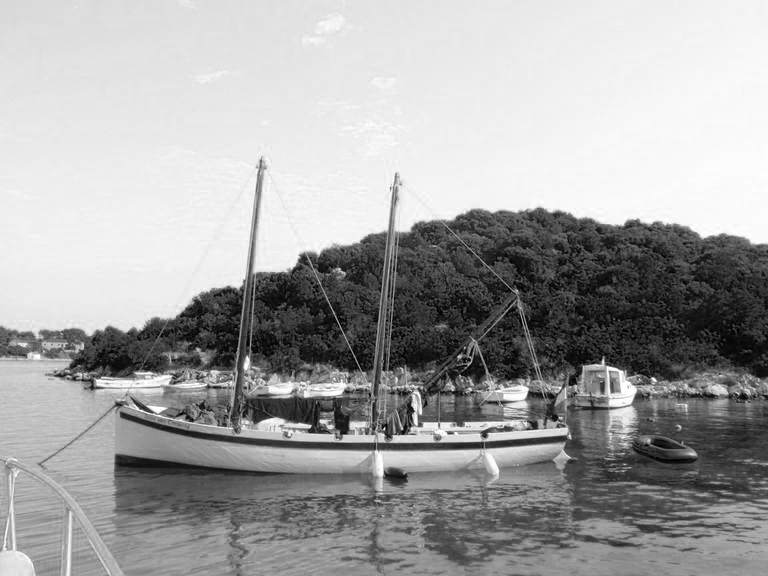

In [8]:
colorview(Gray,Blue)

In [9]:
# Izračunajmo QR rastav s pivotiranjem matrice svakog kanala
using LinearAlgebra
R=qr(Red,Val(true))
G=qr(Green,Val(true))
B=qr(Blue,Val(true));

In [10]:
norm(R.Q*R.R[:,invperm(R.p)]-float(Red))

0.00020910783f0

In [11]:
import Gadfly

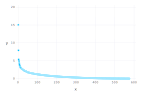

In [12]:
# Nacrtajmo dijagonalne elemente
Gadfly.plot(x=1:size(R.R,1),y=abs.(diag(R.R)))

In [13]:
# Izračunajmo komprimirane matrice za svaki kanal, RedC, GreenC i BlueC
# Funkcija Matrix() je nužna radi bržeg generiranja matrice Q
k=50
RedC=Matrix(R.Q)[:,1:k]*R.R[1:k,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k]*G.R[1:k,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k]*B.R[1:k,invperm(B.p)]

576×768 Array{Float32,2}:
 0.846009  0.845908  0.846347  0.847124  …  0.952303  0.952581  0.954205
 0.846752  0.847336  0.847957  0.848277     0.95254   0.953014  0.954357
 0.850864  0.851758  0.852974  0.853171     0.953747  0.9537    0.956009
 0.853217  0.853922  0.854729  0.853921     0.953028  0.95291   0.955143
 0.855111  0.855731  0.856358  0.855784     0.950925  0.951316  0.953952
 0.854893  0.855375  0.855883  0.856206  …  0.949433  0.949907  0.952582
 0.855159  0.855322  0.855875  0.856268     0.95544   0.955519  0.957598
 0.855548  0.856303  0.85657   0.857649     0.951908  0.951511  0.952662
 0.853055  0.853722  0.854407  0.856438     0.948731  0.948006  0.948622
 0.857237  0.857739  0.85757   0.858625     0.95457   0.953532  0.953981
 0.860174  0.860686  0.860601  0.86153   …  0.9535    0.952296  0.952384
 0.860947  0.861715  0.861924  0.862076     0.950508  0.950109  0.950441
 0.859382  0.859246  0.859719  0.859474     0.953047  0.9532    0.953628
 ⋮                       

In [14]:
norm(Red-RedC)/norm(Red)

0.10693458f0

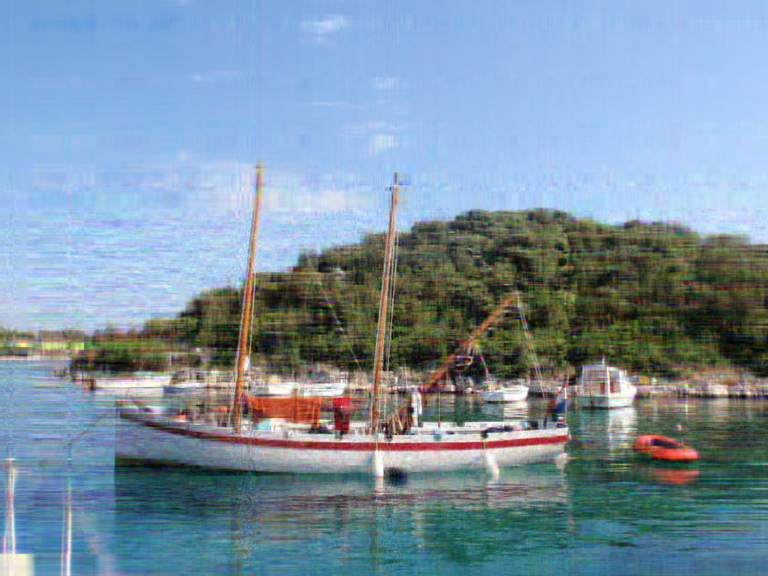

In [15]:
# Nacrtajmo komprimiranu sliku
colorview(RGB, RedC, GreenC, BlueC)

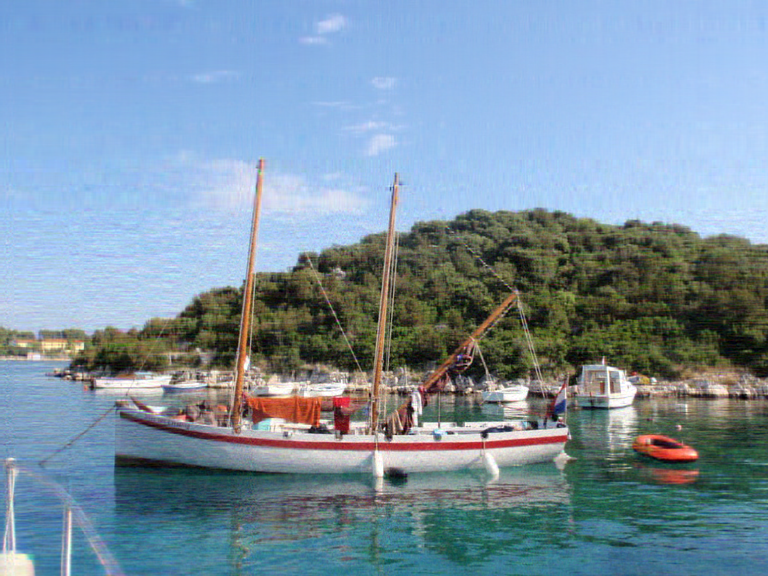

In [16]:
# Pogledajmo kako raste kvalita
k=100
k1=k
k2=k
k3=k
RedC=Matrix(R.Q)[:,1:k1]*R.R[1:k1,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k2]*G.R[1:k2,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k3]*B.R[1:k3,invperm(B.p)]
colorview(RGB,RedC,GreenC,BlueC)